In [78]:
%pylab inline
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [38]:
def plot_spin(data, L):
    data = data.reshape(L*L)
    x = numpy.arange(0, L, 1)
    y = numpy.arange(0, L, 1)
    X, Y = numpy.meshgrid(x, y)
    U = numpy.cos(data)
    V = numpy.sin(data)
    data = data.reshape(L, L)
    U = U.reshape(L, L)
    V = V.reshape(L, L)
    
    width = 0.5
    plt.figure()
    plt.quiver(X, Y, U, V, data, pivot='mid', headlength=10, linewidths=width)
    plt.title('Single vortex')
    plt.savefig('Single_vortex_L=' + str(L)+'.pdf')
    #plt.title('Vortex_antivortex_L=' + str(L) + '_offset=' +  str(offset))
    #plt.savefig('Vortex_antivortex_L=' + str(L) + '_offset=' +  str(offset)  + '.pdf')
    plt.show()
    plt.close()

def xy_to_phi(xx, yy):
    phi = math.atan(yy / xx)
    if xx < 0.0: phi += math.pi
    return phi

In [58]:
L = 64 # use even values of L

XX = numpy.zeros((L, L)); YY = numpy.zeros((L, L))
phi = numpy.zeros((L, L))

In [59]:
#vortex position
offset = L*100 # attention, "offset" is not the cartesian distance between + and -
core_v = numpy.array([L/2 , L/2 ]) - 0.5
core_a = numpy.array([L *1000, L *1000]) - 0.5
#core_v = numpy.array([L / 2 - offset, L / 2 - offset]) - 0.5
#core_a = numpy.array([L / 2 + offset, L / 2 + offset]) - 0.5

In [60]:
#initial configuration with vortex
for xx in range(L):
    for yy in range(L):
        #vortex
        Xv =  -(yy - core_v[0])
        Yv =  -(xx - core_v[1])
        Nv = Xv*Xv + Yv*Yv
        #antivortex
        Xa = xx - core_a[0]
        Ya = yy - core_a[1]
        Na = Xa*Xa + Ya*Ya
        Xx = Xv / Nv + Xa / Na
        Yy = Yv / Nv + Ya / Na
        Norm = math.sqrt(Xx*Xx + Yy*Yy)
        XX[xx, yy] = Xx/Norm; YY[xx, yy] = Yy/Norm

In [61]:
#Neighbor relations:
neighbours = [[[] for xx in range(L)] for yy in range(L)]
for xx in range(L):
    for yy in range(L):
        if xx > 0: neighbours[xx][yy].append((xx-1, yy))
        if xx < L - 1: neighbours[xx][yy].append((xx+1, yy))
        if yy > 0: neighbours[xx][yy].append((xx, yy-1))
        if yy < L - 1: neighbours[xx][yy].append((xx, yy+1))

In [62]:
#Minimization:
for i in range(0, 1000):
    for xx in range(L):
        for yy in range(L):
            Xx = sum([XX[site] for site in neighbours[xx][yy] ])
            Yy = sum([YY[site] for site in neighbours[xx][yy] ])
            Norm = math.sqrt(Xx * Xx + Yy * Yy)
            XX[xx, yy] = Xx / Norm
            YY[xx, yy] = Yy / Norm
    if i % 100 == 0:
        energy = 2.0 * L * (L - 1) - numpy.sum(XX[:, 0:L - 1] * XX[:, 1:L] + YY[:,
              0:L-1] * YY[:, 1:L]) - numpy.sum(XX[0:L-1, :] * XX[1:L, :] + YY[0:L-1, :] * YY[1:L, :])
        print(i, energy)

0 15.2724216393
100 15.1876997402
200 15.183885972
300 15.1835617689
400 15.1835320523
500 15.1835284632
600 15.1835276531


KeyboardInterrupt: 

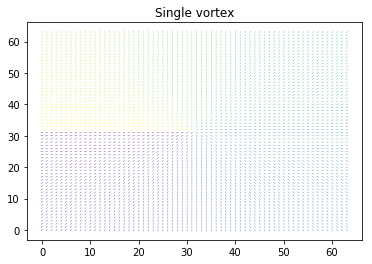

In [43]:
for xx in range(L):
    for yy in range(L):
        phi[xx, yy] = xy_to_phi(XX[xx, yy], YY[xx, yy])
        phi[xx, yy] = (phi[xx, yy] + 2 * math.pi) % (2 * math.pi)
plot_spin(phi, L)

In [70]:
E=[]
l=[2,4,8,16,32,64,128,256,512]

In [71]:
for L in l:
    XX = numpy.zeros((L, L)); YY = numpy.zeros((L, L))
    phi = numpy.zeros((L, L))
    
    offset = L*100 # attention, "offset" is not the cartesian distance between + and -
    core_v = numpy.array([L/2 , L/2 ]) - 0.5
    core_a = numpy.array([L *1000, L *1000]) - 0.5
    
    neighbours = [[[] for xx in range(L)] for yy in range(L)]
    for xx in range(L):
        for yy in range(L):
            if xx > 0: neighbours[xx][yy].append((xx-1, yy))
            if xx < L - 1: neighbours[xx][yy].append((xx+1, yy))
            if yy > 0: neighbours[xx][yy].append((xx, yy-1))
            if yy < L - 1: neighbours[xx][yy].append((xx, yy+1))
    
    #initial configuration with vortex
    for xx in range(L):
        for yy in range(L):
        #vortex
            Xv =  -(yy - core_v[0])
            Yv =  -(xx - core_v[1])
            Nv = Xv*Xv + Yv*Yv
            #antivortex
            Xa = xx - core_a[0]
            Ya = yy - core_a[1]
            Na = Xa*Xa + Ya*Ya
            Xx = Xv / Nv + Xa / Na
            Yy = Yv / Nv + Ya / Na
            Norm = math.sqrt(Xx*Xx + Yy*Yy)
            XX[xx, yy] = Xx/Norm; YY[xx, yy] = Yy/Norm
    
    for i in range(0, 100):
        for xx in range(L):
            for yy in range(L):
                Xx = sum([XX[site] for site in neighbours[xx][yy] ])
                Yy = sum([YY[site] for site in neighbours[xx][yy] ])
                Norm = math.sqrt(Xx * Xx + Yy * Yy)
                XX[xx, yy] = Xx / Norm
                YY[xx, yy] = Yy / Norm
        if i % 10 == 0:
            energy = 2.0 * L * (L - 1) - numpy.sum(XX[:, 0:L - 1] * XX[:, 1:L] + YY[:,
                  0:L-1] * YY[:, 1:L]) - numpy.sum(XX[0:L-1, :] * XX[1:L, :] + YY[0:L-1, :] * YY[1:L, :])
            print(i, energy)
    E.append(energy)

0 -8.881784197e-16
10 -8.881784197e-16
20 -8.881784197e-16
30 -8.881784197e-16
40 -8.881784197e-16
50 -8.881784197e-16
60 -8.881784197e-16
70 -8.881784197e-16
80 -8.881784197e-16
90 -8.881784197e-16
0 6.39328312716
10 6.38532767871
20 6.38532217064
30 6.38532210073
40 6.38532209984
50 6.38532209983
60 6.38532209983
70 6.38532209983
80 6.38532209983
90 6.38532209983
0 8.65082377903
10 8.6320546333
20 8.63203844445
30 8.63203528329
40 8.63203456722
50 8.63203440402
60 8.63203436682
70 8.63203435834
80 8.63203435641
90 8.63203435597
0 10.8679015467
10 10.8248401154
20 10.8240917214
30 10.8240449976
40 10.8240365248
50 10.8240335972
60 10.8240319821
70 10.8240309443
80 10.8240302546
90 10.8240297926
0 13.0756947239
10 13.0225419952
20 13.0112410427
30 13.0073563902
40 13.0059415928
50 13.0054175442
60 13.0052204283
70 13.0051442116
80 13.0051132736
90 13.0050997474
0 15.2724216393
10 15.2333716773
20 15.2186149277
30 15.2094025834
40 15.2030365892
50 15.1984239872
60 15.1949915576
70 15.19

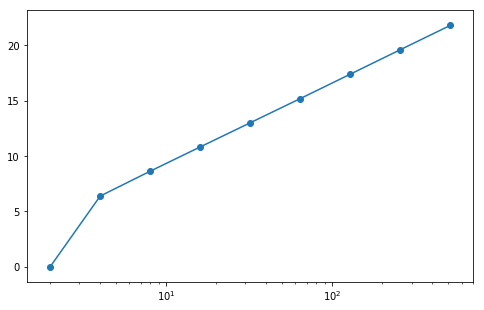

In [75]:
fig, ax= plt.subplots(1, 1, figsize=(8, 5))
ax.semilogx(l,E)
ax.scatter(l,E)

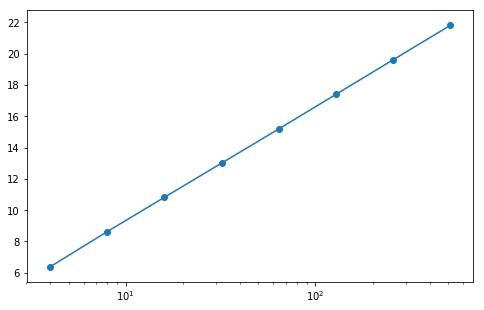

In [77]:
fig, ax= plt.subplots(1, 1, figsize=(8, 5))
ax.semilogx(l[1:],E[1:])
ax.scatter(l[1:],E[1:])

In [84]:
slope,intercept,rvalue=stats.linregress(log(l[1:]),E[1:])[0:3]

In [91]:
z=linspace(min(log(l)),max(log(l)),100)

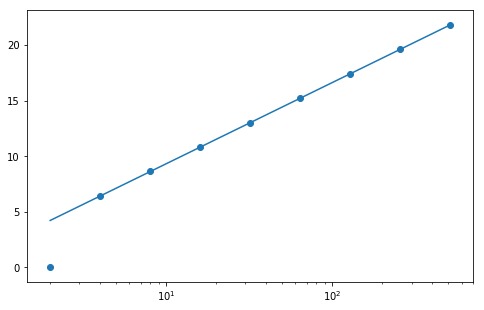

In [93]:
fig, ax= plt.subplots(1, 1, figsize=(8, 5))
ax.semilogx(exp(z),[slope*t+intercept for t in z])
ax.scatter(l,E)

In [87]:
rvalue

0.9999957096703932

In [97]:
J=slope/pi
Ecore=intercept
print(J,Ecore)

1.0095605547 2.0131934488


# Part 3

Can't use big offsets as the vortex and antivortex have to remain inside to account for the energy. Also the separation is closer to 
$$
2\sqrt{2} \text{offset}
$$

In [108]:
L=128
o=[10,12,15,20,25,30]
Eva=[]

In [109]:
for offset in o:
    XX = numpy.zeros((L, L)); YY = numpy.zeros((L, L))
    phi = numpy.zeros((L, L))
    
    core_v = numpy.array([L / 2 - offset, L / 2 - offset]) - 0.5
    core_a = numpy.array([L / 2 + offset, L / 2 + offset]) - 0.5
    
    neighbours = [[[] for xx in range(L)] for yy in range(L)]
    for xx in range(L):
        for yy in range(L):
            if xx > 0: neighbours[xx][yy].append((xx-1, yy))
            if xx < L - 1: neighbours[xx][yy].append((xx+1, yy))
            if yy > 0: neighbours[xx][yy].append((xx, yy-1))
            if yy < L - 1: neighbours[xx][yy].append((xx, yy+1))
    
    #initial configuration with vortex
    for xx in range(L):
        for yy in range(L):
        #vortex
            Xv =  -(yy - core_v[0])
            Yv =  -(xx - core_v[1])
            Nv = Xv*Xv + Yv*Yv
            #antivortex
            Xa = xx - core_a[0]
            Ya = yy - core_a[1]
            Na = Xa*Xa + Ya*Ya
            Xx = Xv / Nv + Xa / Na
            Yy = Yv / Nv + Ya / Na
            Norm = math.sqrt(Xx*Xx + Yy*Yy)
            XX[xx, yy] = Xx/Norm; YY[xx, yy] = Yy/Norm
    
    for i in range(0, 100):
        for xx in range(L):
            for yy in range(L):
                Xx = sum([XX[site] for site in neighbours[xx][yy] ])
                Yy = sum([YY[site] for site in neighbours[xx][yy] ])
                Norm = math.sqrt(Xx * Xx + Yy * Yy)
                XX[xx, yy] = Xx / Norm
                YY[xx, yy] = Yy / Norm
        if i % 10 == 0:
            energy = 2.0 * L * (L - 1) - numpy.sum(XX[:, 0:L - 1] * XX[:, 1:L] + YY[:,
                  0:L-1] * YY[:, 1:L]) - numpy.sum(XX[0:L-1, :] * XX[1:L, :] + YY[0:L-1, :] * YY[1:L, :])
            print(i, energy)
    Eva.append(energy)

0 35.9141242214
10 35.4473632897
20 35.1280497656
30 34.8612818452
40 34.6285607997
50 34.4210192451
60 34.2333109566
70 34.0618253006
80 33.9039519518
90 33.7577155814
0 34.9941387236
10 34.6564057183
20 34.4327871821
30 34.2457182272
40 34.0816191844
50 33.9343416509
60 33.800301536
70 33.6771233862
80 33.5631061225
90 33.4569672422
0 34.1206666661
10 33.8854188211
20 33.7387206692
30 33.6174541311
40 33.5114404176
50 33.4163136327
60 33.329633828
70 33.2498335888
80 33.1758153852
90 33.1067646565
0 33.2384347155
10 33.0828499395
20 32.9955033318
30 32.9259692889
40 32.8665679883
50 32.8141187638
60 32.7669038007
70 32.7238537021
80 32.6842402198
90 32.6475357719
0 32.6045213818
10 32.4857996371
20 32.4256625506
30 32.3800780136
40 32.3425174021
50 32.3103066856
60 32.2820201749
70 32.2567825865
80 32.2340063282
90 32.2132717945
0 32.0159256452
10 31.9140032357
20 31.8669373793
30 31.8331037771
40 31.8064020179
50 31.7843465501
60 31.7656211036
70 31.7494239667
80 31.7352218439
90 31

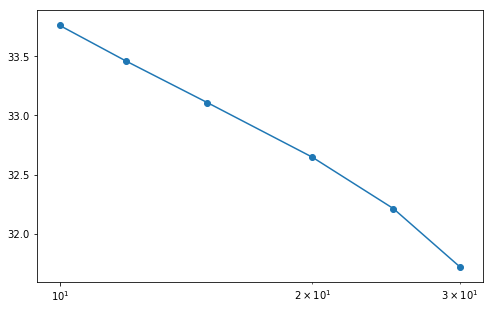

In [113]:
fig, ax= plt.subplots(1, 1, figsize=(8, 5))
ax.semilogx(o,Eva)
ax.scatter(o,Eva)

In [114]:
slope,intercept,rvalue=stats.linregress(log(o),Eva)[0:3]

In [115]:
z=linspace(min(log(o)),max(log(o)),100)

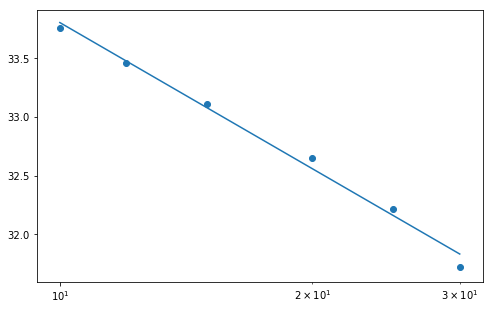

In [116]:
fig, ax= plt.subplots(1, 1, figsize=(8, 5))
ax.semilogx(exp(z),[slope*t+intercept for t in z])
ax.scatter(o,Eva)